In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv("./telecom_churn.csv")

In [100]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


### Discovery

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3337 non-null   object 
 1   Account length          3337 non-null   int64  
 2   Area code               3337 non-null   int64  
 3   International plan      3336 non-null   object 
 4   Voice mail plan         3334 non-null   object 
 5   Number vmail messages   3337 non-null   int64  
 6   Total day minutes       3330 non-null   float64
 7   Total day calls         3335 non-null   float64
 8   Total day charge        3332 non-null   float64
 9   Total eve minutes       3334 non-null   float64
 10  Total eve calls         3336 non-null   float64
 11  Total eve charge        3327 non-null   float64
 12  Total night minutes     3331 non-null   float64
 13  Total night calls       3337 non-null   int64  
 14  Total night charge      3335 non-null   

In [102]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [103]:
df["Area code"] = df["Area code"].astype("object")

In [104]:
df.describe(include=['float64', 'int64'])

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3337.000000,3337.000000,3330.000000,3335.000000,3332.000000,3334.000000,3336.000000,3327.000000,3331.000000,3337.000000,3335.000000,3336.000000,3336.000000,3336.000000,3337.000000
mean,101.076116,8.089302,179.682793,100.459670,30.551357,200.994691,100.090228,17.079387,200.833473,100.102188,9.037601,10.236661,4.478417,2.764284,1.563680
std,39.814327,13.683027,54.490775,20.051975,9.258336,50.688619,19.939487,4.309460,50.569425,19.574292,2.274813,2.791527,2.460753,0.753731,1.315458
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.600000,87.000000,24.410000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.350000,101.000000,30.500000,201.400000,100.000000,17.110000,201.100000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.200000,114.000000,36.755000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [105]:
## Make columns uniform
df.columns = df.columns.str.replace(" ", "_").str.lower().str.strip()

In [106]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3.0,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3.0,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5.0,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7.0,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,NaN,186.9,121,8.41,10.1,3.0,2.73,3,False


### Missing Values

In [107]:
df.isnull().sum()

state                      0
account_length             0
area_code                  0
international_plan         1
voice_mail_plan            3
number_vmail_messages      0
total_day_minutes          7
total_day_calls            2
total_day_charge           5
total_eve_minutes          3
total_eve_calls            1
total_eve_charge          10
total_night_minutes        6
total_night_calls          0
total_night_charge         2
total_intl_minutes         1
total_intl_calls           1
total_intl_charge          1
customer_service_calls     0
churn                      8
dtype: int64

In [108]:
## Remove missing values in the target variable
df.dropna(subset=["churn"], inplace=True, axis=0)

In [109]:
df.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        1
voice_mail_plan           3
number_vmail_messages     0
total_day_minutes         7
total_day_calls           2
total_day_charge          5
total_eve_minutes         3
total_eve_calls           1
total_eve_charge          9
total_night_minutes       6
total_night_calls         0
total_night_charge        2
total_intl_minutes        1
total_intl_calls          1
total_intl_charge         1
customer_service_calls    0
churn                     0
dtype: int64

In [110]:
## Missing values in categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

In [111]:
cat_cols

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [112]:
cat_data = df[cat_cols[:-1]]
cat_data.head()

,state,area_code,international_plan,voice_mail_plan
0,KS,415,No,Yes
1,OH,415,No,Yes
2,NJ,415,No,No
3,OH,408,Yes,No
4,OK,415,Yes,No


In [113]:
cat_data.isnull().sum()

state                 0
area_code             0
international_plan    1
voice_mail_plan       3
dtype: int64

### Duplicates

In [114]:
duplicates = df[df.duplicated()]

In [115]:
duplicates

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
157,MS,162,415,No,No,0,70.7,108.0,12.02,157.5,87.0,13.39,154.8,82,6.97,9.1,3.0,2.46,4,True
252,MI,105,510,No,No,0,140.6,109.0,23.90,178.6,51.0,15.18,217.0,83,9.76,6.8,3.0,1.84,2,False
327,SC,78,510,No,No,0,168.3,110.0,28.61,221.2,73.0,18.80,241.0,136,10.85,12.5,1.0,3.38,1,False


In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df[df.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn


In [118]:
df.dropna(inplace=True, axis=0)

## Univariate Analysis

In [119]:
def numeric_univariate(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Description
    description = df[column].describe(include="all")
    describe_df = pd.DataFrame(description)
    describe_df.columns = ["value"]
    print(describe_df)

    # Boxplot
    sns.boxplot(ax=axes[0], data=df, x=column)
    axes[0].set_title(f"{column} (Boxplot)")

    # Distribution
    sns.kdeplot(ax=axes[1], data=df, x=column, shade=True)
    axes[1].set_title(f"{column} (KDE)")
    plt.show()
    
    #Skewness
    print(f'{column}[Skewness]: {scipy.stats.skew(df[column])}')
    print(f'{column}[Kurtosis]: {scipy.stats.kurtosis(df[column])}')

In [120]:
numeric_cols = [col for col in df.columns if df[col].dtype != "object"]

             value
count  3287.000000
mean    101.094615
std      39.808464
min       1.000000
25%      74.000000
50%     101.000000
75%     127.000000
max     243.000000


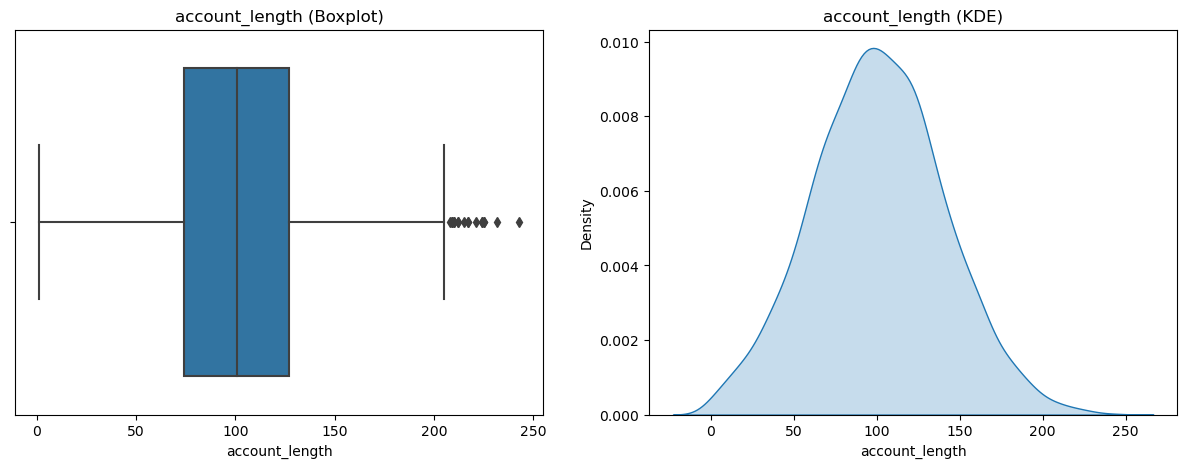

account_length[Skewness]: 0.09431201585678221
account_length[Kurtosis]: -0.10345328683050115
             value
count  3287.000000
mean      8.093702
std      13.671290
min       0.000000
25%       0.000000
50%       0.000000
75%      20.000000
max      51.000000


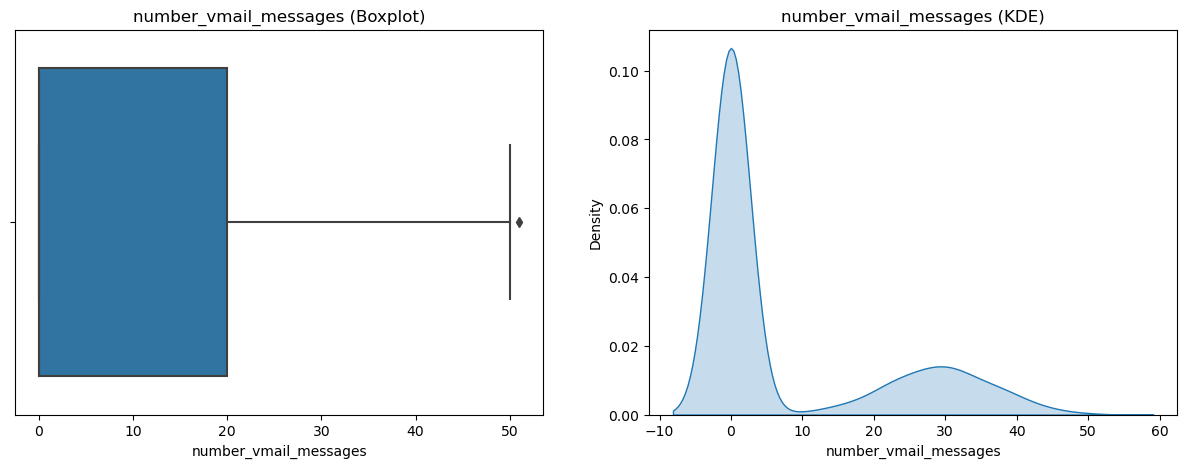

number_vmail_messages[Skewness]: 1.2626555200988057
number_vmail_messages[Kurtosis]: -0.05714865686287274
             value
count  3287.000000
mean    179.674384
std      54.542716
min       0.000000
25%     143.600000
50%     179.300000
75%     216.200000
max     350.800000


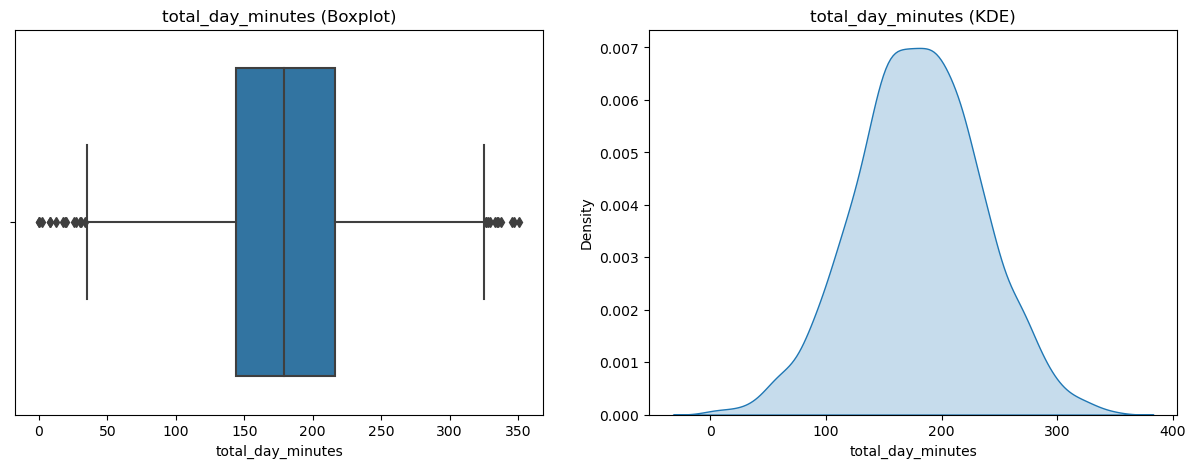

total_day_minutes[Skewness]: -0.026921956217248518
total_day_minutes[Kurtosis]: -0.01564669905772975
             value
count  3287.000000
mean    100.433830
std      20.045227
min       0.000000
25%      87.000000
50%     101.000000
75%     114.000000
max     165.000000


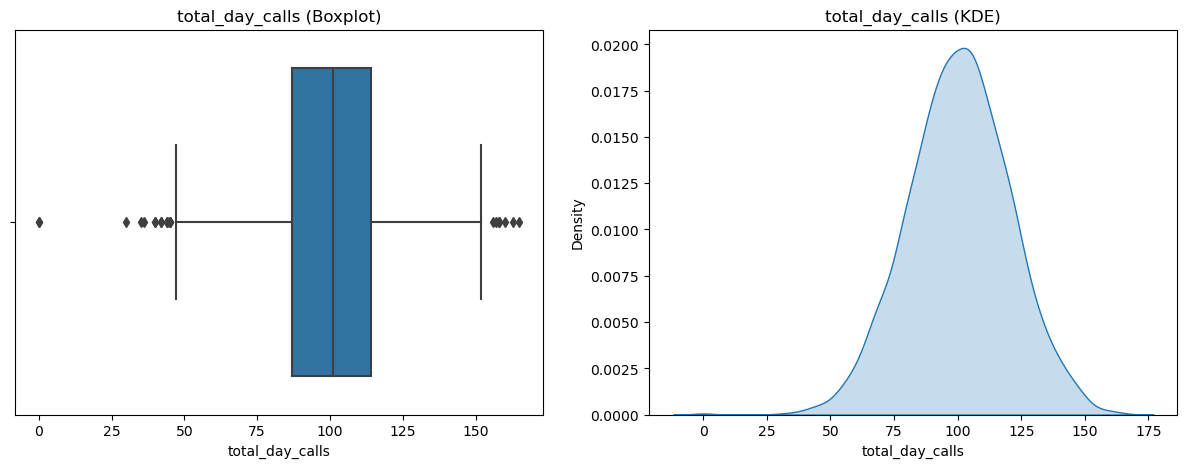

total_day_calls[Skewness]: -0.11754014131691219
total_day_calls[Kurtosis]: 0.25167036308675783
             value
count  3287.000000
mean     30.545187
std       9.272238
min       0.000000
25%      24.410000
50%      30.480000
75%      36.750000
max      59.640000


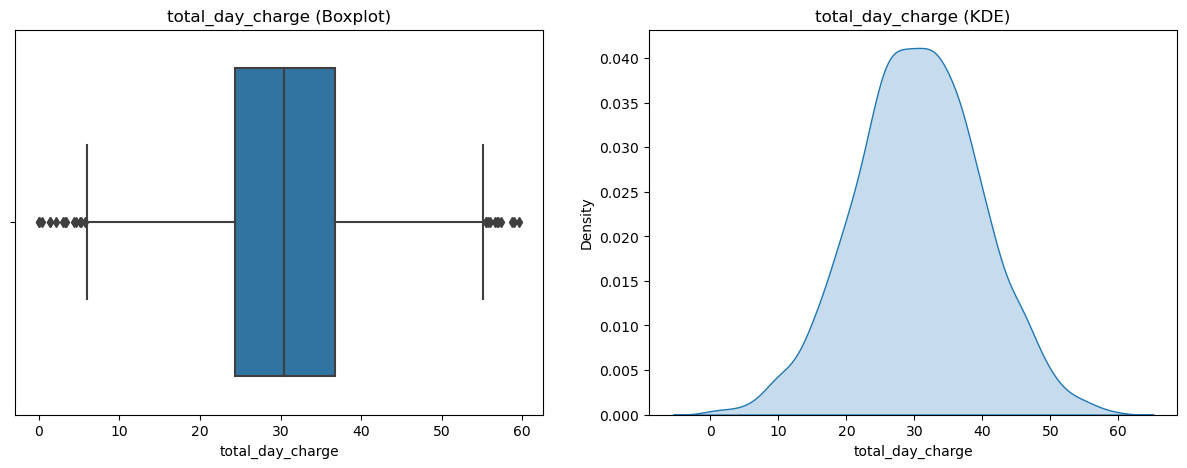

total_day_charge[Skewness]: -0.02693040022544671
total_day_charge[Kurtosis]: -0.01551581836181315
             value
count  3287.000000
mean    201.042683
std      50.666514
min       0.000000
25%     166.750000
50%     201.400000
75%     235.350000
max     363.700000


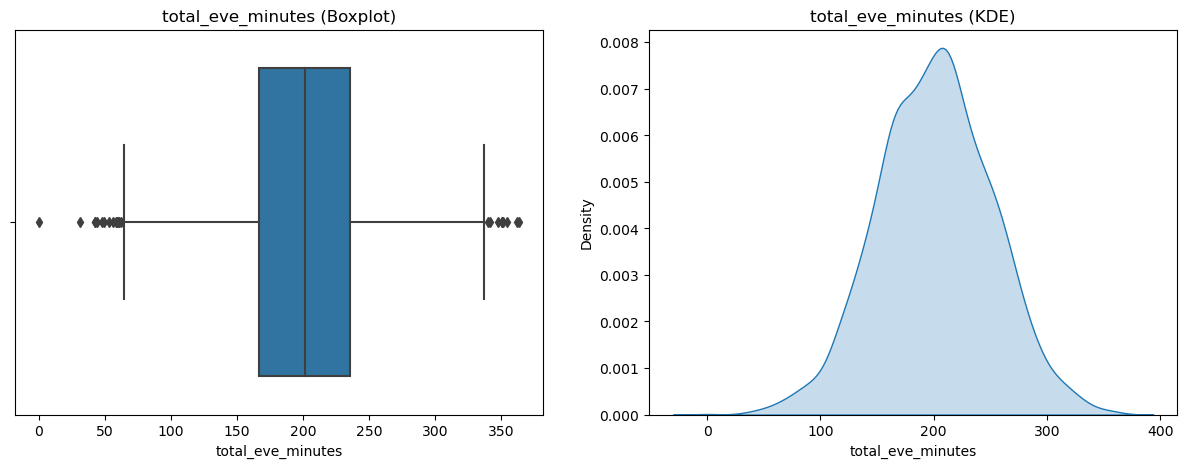

total_eve_minutes[Skewness]: -0.030546355606183427
total_eve_minutes[Kurtosis]: 0.02792823257542132
             value
count  3287.000000
mean    100.108610
std      19.937106
min       0.000000
25%      87.000000
50%     100.000000
75%     114.000000
max     170.000000


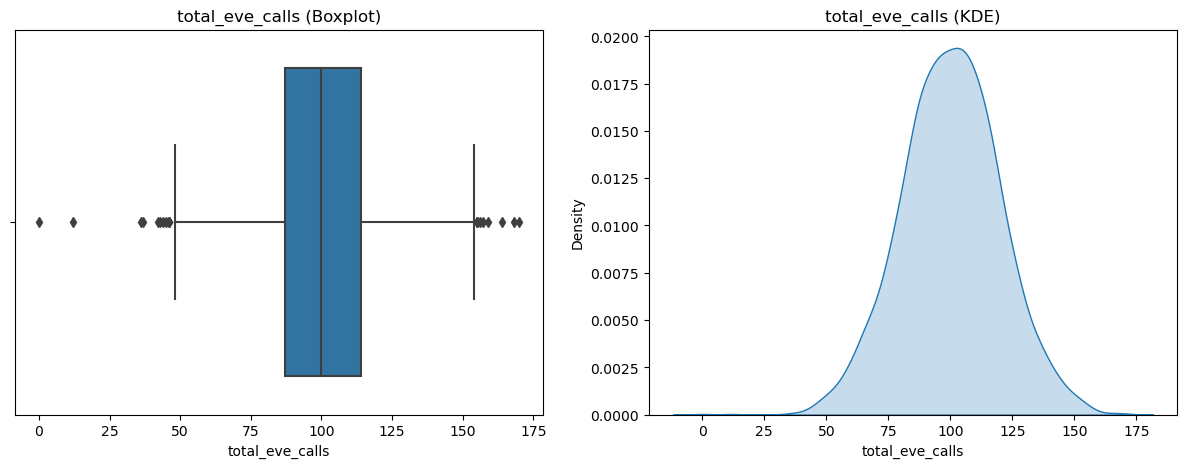

total_eve_calls[Skewness]: -0.055537960060560415
total_eve_calls[Kurtosis]: 0.21845602781504958
             value
count  3287.000000
mean     17.088826
std       4.306647
min       0.000000
25%      14.175000
50%      17.120000
75%      20.005000
max      30.910000


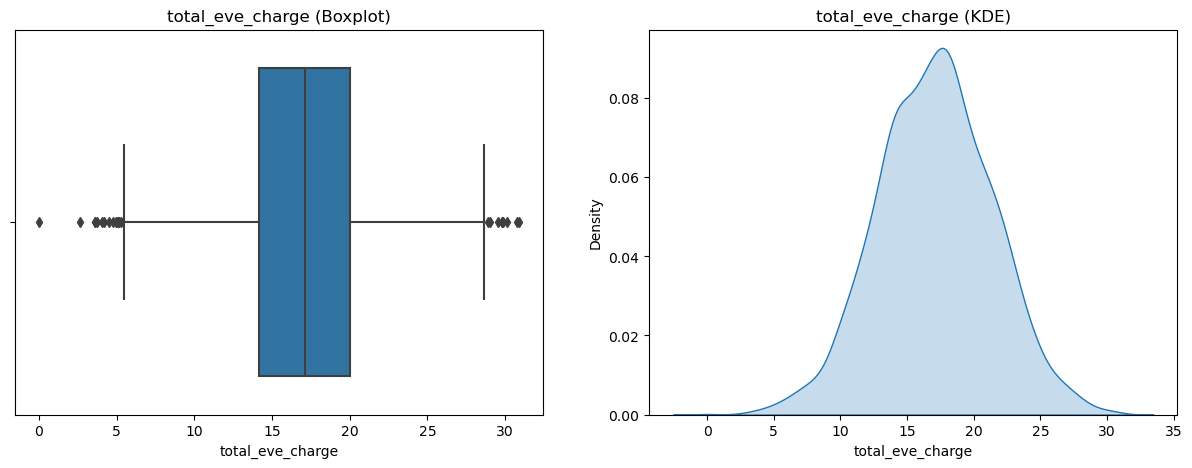

total_eve_charge[Skewness]: -0.030525614590557384
total_eve_charge[Kurtosis]: 0.027786381314852893
             value
count  3287.000000
mean    201.035564
std      50.507651
min      23.200000
25%     167.100000
50%     201.400000
75%     235.400000
max     395.000000


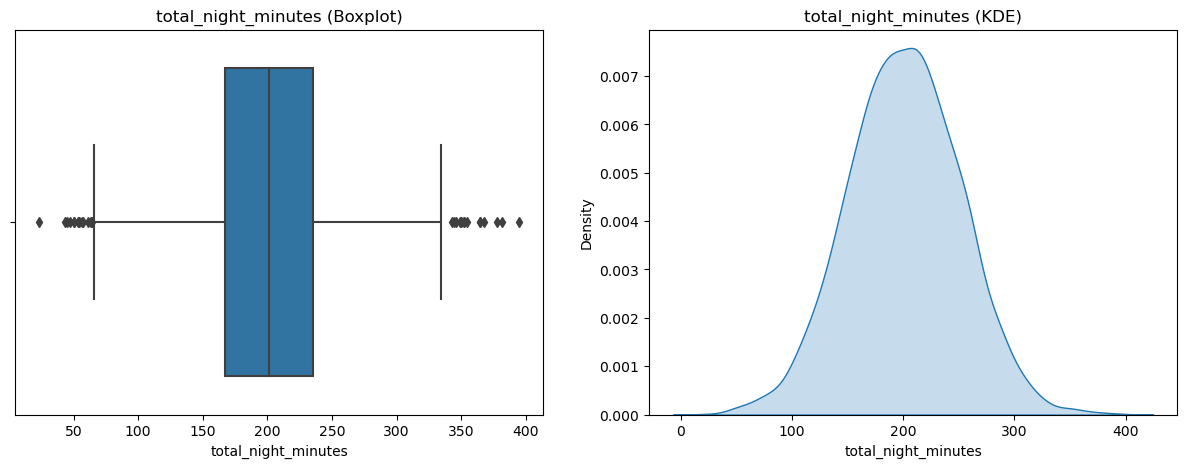

total_night_minutes[Skewness]: 0.008830608815900974
total_night_minutes[Kurtosis]: 0.09209165625487392
             value
count  3287.000000
mean    100.064497
std      19.592939
min      33.000000
25%      87.000000
50%     100.000000
75%     113.000000
max     175.000000


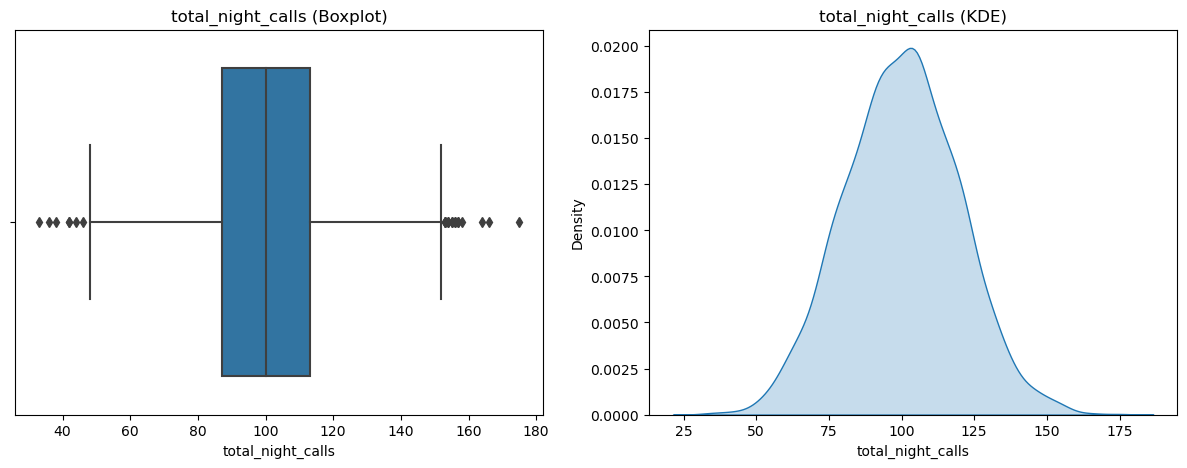

total_night_calls[Skewness]: 0.033237786581781524
total_night_calls[Kurtosis]: -0.07268689559278796
             value
count  3287.000000
mean      9.046687
std       2.272881
min       1.040000
25%       7.520000
50%       9.060000
75%      10.590000
max      17.770000


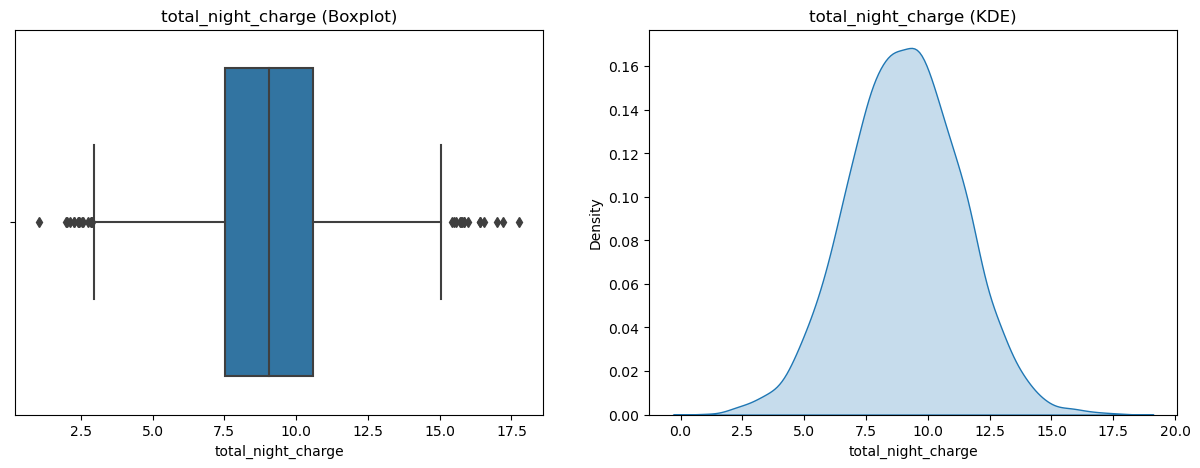

total_night_charge[Skewness]: 0.008799432071749836
total_night_charge[Kurtosis]: 0.09191969549379797
             value
count  3287.000000
mean     10.240949
std       2.790308
min       0.000000
25%       8.500000
50%      10.300000
75%      12.100000
max      18.900000


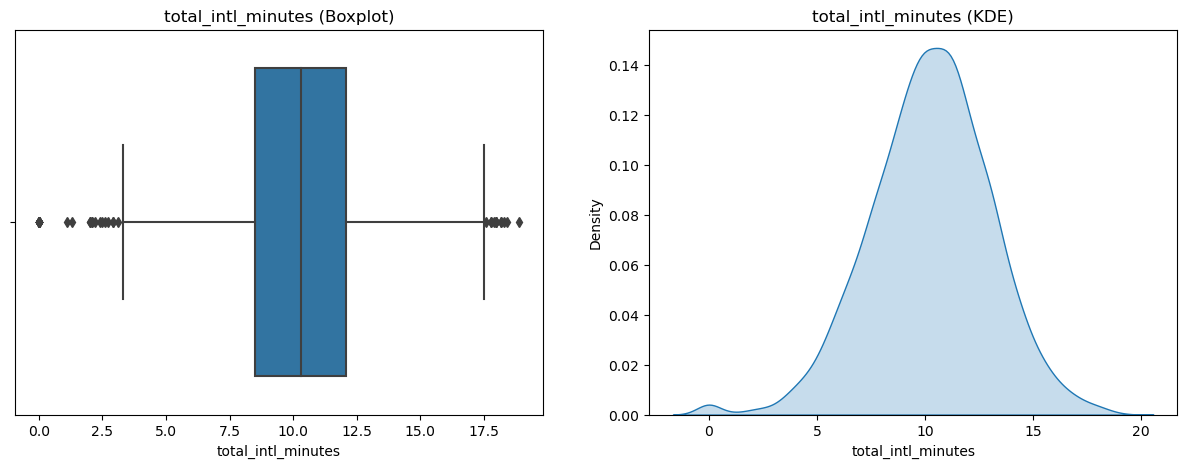

total_intl_minutes[Skewness]: -0.267631580318254
total_intl_minutes[Kurtosis]: 0.5909766136066148
             value
count  3287.000000
mean      4.477943
std       2.460902
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      20.000000


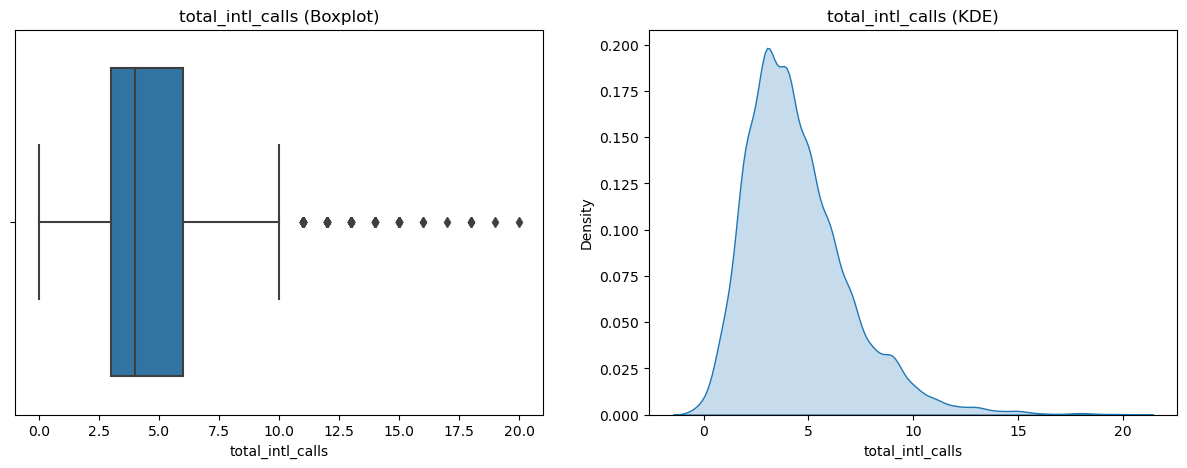

total_intl_calls[Skewness]: 1.3278639160456696
total_intl_calls[Kurtosis]: 3.119081813956404
             value
count  3287.000000
mean      2.765561
std       0.753367
min       0.000000
25%       2.300000
50%       2.780000
75%       3.270000
max       5.100000


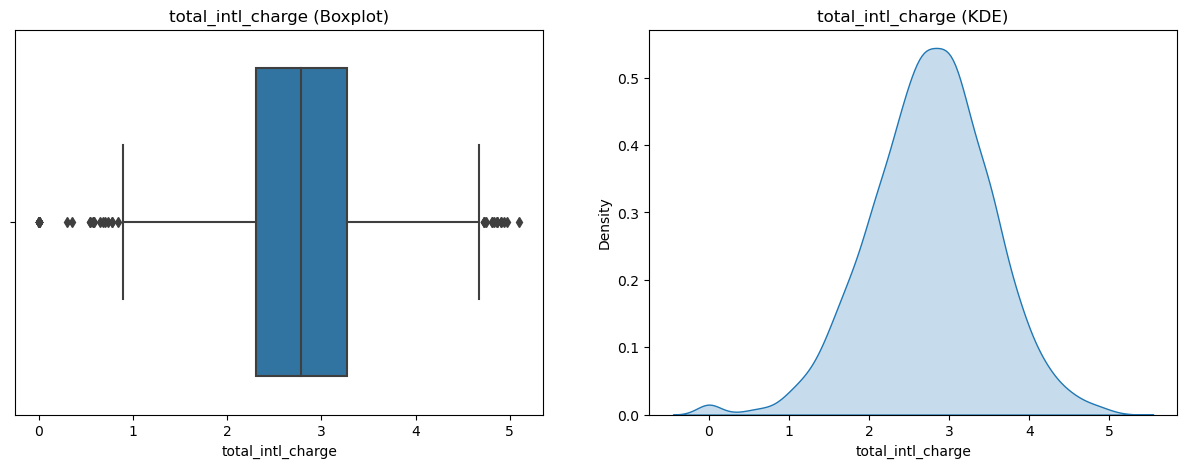

total_intl_charge[Skewness]: -0.26777258379512786
total_intl_charge[Kurtosis]: 0.5913684450110717
             value
count  3287.000000
mean      1.563432
std       1.317577
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       9.000000


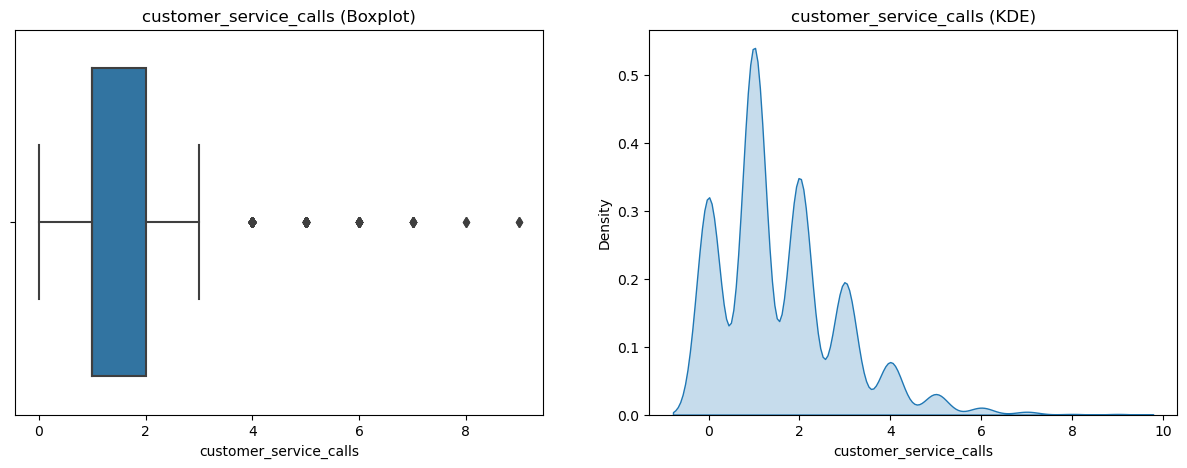

customer_service_calls[Skewness]: 1.0951080023783994
customer_service_calls[Kurtosis]: 1.7364778196753612


In [121]:
for col in numeric_cols:
    numeric_univariate(col)

In [129]:
def remove_outliers(col):
    const = 1.5
    iqr = scipy.stats.iqr(df[col]) * const
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.77)
    lower = q1 - iqr
    upper = q3 + iqr
    return lower, upper

In [130]:
lower, upper = remove_outliers("total_day_minutes")

In [131]:
cleaned = df[(df["total_day_minutes"] < upper) & (df["total_day_minutes"] > lower)]

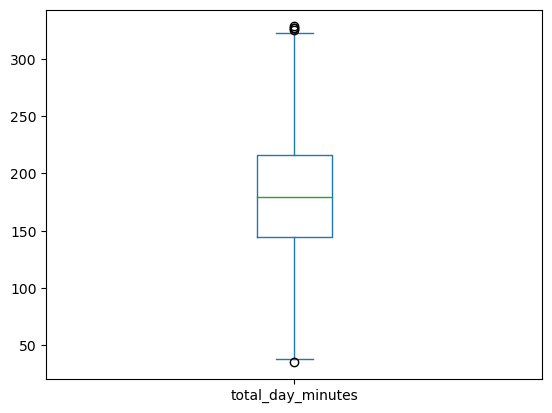

In [133]:
cleaned["total_day_minutes"].plot(kind="box")
plt.show()

#### Catetogical

In [135]:
cat_data["state"].value_counts()

WV    106
NY     83
MN     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
ID     74
MI     74
VT     73
UT     72
IN     71
TX     71
KS     70
MD     70
NJ     68
NC     68
MT     67
MS     66
NV     66
WA     66
RI     65
CO     65
AZ     64
MA     64
MO     63
FL     63
NM     62
ND     62
OK     61
ME     61
NE     61
SC     61
DE     61
SD     60
KY     59
IL     58
AR     55
NH     55
GA     54
DC     53
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [137]:
cat_data["international_plan"].value_counts()

No     3007
Yes     321
Name: international_plan, dtype: int64

In [138]:
cat_data["voice_mail_plan"].value_counts()

No     2408
Yes     918
Name: voice_mail_plan, dtype: int64